In [31]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error


plt.rcParams['font.family'] = 'Noto Sans'

In [32]:
#Cell_2.
csv_in="yields.csv"
df=pd.read_csv(csv_in,skiprows=0,header=0,delimiter=',',encoding="shift-jis")
print(df.shape) #確認
print(df.head()) #確認
print(type(df['time'][0]))\
#df['time']=pd.to_datetime(df['time'].astype(int),unit='ms')
#df['time']=pd.to_datetime(df['time'])
#print(type(df['time'][0]))

(12787, 216)
           time  AU01  AU02   AU03  AU05  AU07  AU10  AU15  AU20  AU30  ...  \
0  957533400000  6.28  6.34  6.460  6.52   0.0  6.56  6.56   0.0   0.0  ...   
1  957792600000  6.26  6.34  6.415  6.52   0.0  6.56  6.49   0.0   0.0  ...   
2  957879000000  6.34  6.38  6.500  6.54   0.0  6.55  6.55   0.0   0.0  ...   
3  957965400000  6.24  6.34  6.390  6.51   0.0  6.54  6.50   0.0   0.0  ...   
4  958051800000  6.22  6.26  6.374  6.42   0.0  6.41  6.42   0.0   0.0  ...   

   US03M  US06M  US01   US02   US03   US05  US07   US10  US20   US30  
0  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.511   0.0  6.157  
1  5.899  5.910   0.0  6.784  4.557  6.692   0.0  6.568   0.0  6.157  
2  5.984  6.031   0.0  6.872  4.557  6.827   0.0  6.524   0.0  6.248  
3  6.115  6.140   0.0  6.851  4.557  6.788   0.0  6.457   0.0  6.216  
4  6.083  6.104   0.0  6.804  4.557  6.668   0.0  6.420   0.0  6.154  

[5 rows x 216 columns]
<class 'numpy.int64'>


In [33]:
#Cell_3.
from datetime import datetime
for i in range(len(df)):
    df.loc[i,'time']= datetime.fromtimestamp((df.loc[i,'time']/1000))

In [34]:
#Cell_4.
display(df.head())
display(df.tail())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2000-05-05 22:30:00,6.28,6.34,6.460,6.52,0.0,6.56,6.56,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.511,0.0,6.157
1,2000-05-08 22:30:00,6.26,6.34,6.415,6.52,0.0,6.56,6.49,0.0,0.0,...,5.899,5.910,0.0,6.784,4.557,6.692,0.0,6.568,0.0,6.157
2,2000-05-09 22:30:00,6.34,6.38,6.500,6.54,0.0,6.55,6.55,0.0,0.0,...,5.984,6.031,0.0,6.872,4.557,6.827,0.0,6.524,0.0,6.248
3,2000-05-10 22:30:00,6.24,6.34,6.390,6.51,0.0,6.54,6.50,0.0,0.0,...,6.115,6.140,0.0,6.851,4.557,6.788,0.0,6.457,0.0,6.216
4,2000-05-11 22:30:00,6.22,6.26,6.374,6.42,0.0,6.41,6.42,0.0,0.0,...,6.083,6.104,0.0,6.804,4.557,6.668,0.0,6.420,0.0,6.154


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
12782,1973-04-03 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12783,1973-04-04 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12784,1973-04-05 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12785,1973-04-06 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12786,1973-04-09 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#Cell_5.
df_sorted = df.sort_values(by='time')
display(df_sorted.tail(20))

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
5068,2020-06-26 22:30:00,0.2573,0.2644,0.2594,0.3934,0.5907,0.8779,1.1987,1.4933,1.7047,...,0.1344,0.1674,0.1649,0.1761,0.1945,0.3050,0.4849,0.6495,1.1488,1.3744
5069,2020-06-29 22:30:00,0.2400,0.2581,0.2629,0.3917,0.6019,0.8942,1.2294,1.5297,1.7333,...,0.1242,0.1547,0.1624,0.1591,0.1672,0.2692,0.4593,0.6266,1.1422,1.3737
5070,2020-06-30 22:30:00,0.2555,0.2581,0.2652,0.3980,0.5910,0.8794,1.2070,1.5150,1.7250,...,0.1420,0.1674,0.1522,0.1677,0.1796,0.2773,0.4744,0.6577,1.1758,1.4110
5071,2020-07-01 22:30:00,0.2601,0.2480,0.2817,0.4063,0.6305,0.9461,1.2634,1.5892,1.7975,...,0.1420,0.1624,0.1624,0.1764,0.1905,0.3089,0.5035,0.6783,1.1874,1.4222
5072,2020-07-02 22:30:00,0.2586,0.2547,0.2700,0.4054,0.6163,0.9354,1.2693,1.5813,1.7923,...,0.1420,0.1573,0.1599,0.1659,0.1826,0.2925,0.4930,0.6750,1.1919,1.4302
5073,2020-07-06 22:30:00,0.2590,0.2525,0.2718,0.4157,0.6142,0.9363,1.2715,1.6007,1.8396,...,0.1420,0.1674,0.1522,0.1681,0.1881,0.2981,0.4965,0.6816,1.2030,1.4402
5074,2020-07-07 22:30:00,0.2570,0.2559,0.2645,0.4013,0.5883,0.8925,1.2263,1.5573,1.8273,...,0.1471,0.1624,0.1624,0.1703,0.1909,0.2826,0.4673,0.6414,1.1439,1.3757
5075,2020-07-08 22:30:00,0.2526,0.2554,0.2710,0.3925,0.5737,0.8805,1.1973,1.5140,1.7778,...,0.1471,0.1573,0.1522,0.1726,0.1903,0.2931,0.4953,0.6693,1.1701,1.4032
5076,2020-07-09 22:30:00,0.2544,0.2552,0.2675,0.4072,0.5982,0.9068,1.2303,1.5345,1.8116,...,0.1471,0.1522,0.1497,0.1618,0.1825,0.2792,0.4591,0.6217,1.0925,1.3150
5077,2020-07-10 22:30:00,0.2500,0.2520,0.2705,0.4073,0.5763,0.8655,1.1903,1.5029,1.7707,...,0.1268,0.1471,0.1522,0.1729,0.1956,0.2979,0.4824,0.6463,1.1144,1.3359


In [36]:
#Cell_6.
df_sorted['time']=pd.to_datetime(df_sorted['time'])
df_sorted['time']=df_sorted['time'].dt.date

df_sorted=df_sorted.reset_index(drop=True)
df_sorted['time']=pd.to_datetime(df_sorted['time'])
display(df_sorted.head())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,1970-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Cell_7.
csv_in2="8306_2018.csv"
df2=pd.read_csv(csv_in2,skiprows=1,header=0,delimiter=',',encoding="shift-jis")
print(df2.shape) #確認
print(df2.head()) #確認
print(type(df2['日付'][0]))
df2['日付']=pd.to_datetime(df2['日付'])
print(type(df2['日付'][0]))

(105, 7)
           日付     始値     高値     安値     終値       出来高  終値調整値
0  2018-01-04  841.5  847.3  838.5  847.1  81329100  847.1
1  2018-01-05  857.9  870.0  857.9  866.8  98933500  866.8
2  2018-01-09  876.0  877.3  859.3  863.4  72297900  863.4
3  2018-01-10  871.0  880.8  870.2  876.8  79009900  876.8
4  2018-01-11  880.0  883.0  872.5  881.9  72964800  881.9
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [38]:
#Cell_8.
df2.columns=['time','start','high','low','close','volume','adj-close']
display(df2.head())

,time,start,high,low,close,volume,adj-close
0,2018-01-04,841.5,847.3,838.5,847.1,81329100,847.1
1,2018-01-05,857.9,870.0,857.9,866.8,98933500,866.8
2,2018-01-09,876.0,877.3,859.3,863.4,72297900,863.4
3,2018-01-10,871.0,880.8,870.2,876.8,79009900,876.8
4,2018-01-11,880.0,883.0,872.5,881.9,72964800,881.9


In [39]:
#Cell_9.
df_merged=pd.merge(df2,df_sorted,on='time',how='left')
df_merged=df_merged.fillna(method='ffill')
display(df_merged.head())

,time,start,high,low,close,volume,adj-close,AU01,AU02,AU03,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,2018-01-04,841.5,847.3,838.5,847.1,81329100,847.1,1.6914,1.8644,2.0798,...,1.4091,1.5956,1.8125,1.9515,2.0398,2.2953,2.4114,2.4817,0.0,2.7882
1,2018-01-05,857.9,870.0,857.9,866.8,98933500,866.8,1.6914,1.8644,2.0798,...,1.4038,1.5888,1.8005,1.9599,2.0706,2.2852,2.4040,2.4772,0.0,2.8078
2,2018-01-09,876.0,877.3,859.3,863.4,72297900,863.4,1.7094,1.9067,2.1311,...,1.4488,1.6007,1.7861,1.9804,2.0876,2.3375,2.4707,2.5563,0.0,2.8992
3,2018-01-10,871.0,880.8,870.2,876.8,79009900,876.8,1.7004,2.0300,2.1258,...,1.4168,1.5865,1.7639,1.9846,2.0946,2.3342,2.4739,2.5595,0.0,2.9016
4,2018-01-11,880.0,883.0,872.5,881.9,72964800,881.9,1.8282,2.0522,2.1549,...,1.4295,1.5891,1.7691,1.9929,2.1027,2.3393,2.4758,2.5477,0.0,2.8681


In [40]:
#Cell_10.
df_d=df_merged.copy()
df_d['time']-=df_d['time'][0]
#print(type(df_d['time'][0]))
df_d['time']/=np.timedelta64(1,'D')
#print(type(df_d['日付'][0]))
print(df_d.head())

   time  start   high    low  close    volume  adj-close    AU01    AU02  \
0   0.0  841.5  847.3  838.5  847.1  81329100      847.1  1.6914  1.8644   
1   1.0  857.9  870.0  857.9  866.8  98933500      866.8  1.6914  1.8644   
2   5.0  876.0  877.3  859.3  863.4  72297900      863.4  1.7094  1.9067   
3   6.0  871.0  880.8  870.2  876.8  79009900      876.8  1.7004  2.0300   
4   7.0  880.0  883.0  872.5  881.9  72964800      881.9  1.8282  2.0522   

     AU03  ...   US03M   US06M    US01    US02    US03    US05    US07  \
0  2.0798  ...  1.4091  1.5956  1.8125  1.9515  2.0398  2.2953  2.4114   
1  2.0798  ...  1.4038  1.5888  1.8005  1.9599  2.0706  2.2852  2.4040   
2  2.1311  ...  1.4488  1.6007  1.7861  1.9804  2.0876  2.3375  2.4707   
3  2.1258  ...  1.4168  1.5865  1.7639  1.9846  2.0946  2.3342  2.4739   
4  2.1549  ...  1.4295  1.5891  1.7691  1.9929  2.1027  2.3393  2.4758   

     US10  US20    US30  
0  2.4817   0.0  2.7882  
1  2.4772   0.0  2.8078  
2  2.5563   0.0  2.8

In [41]:
#Cell_11.
X = df_d.drop(columns=['close','high','low','start','volume','adj-close'])
Y = df_d[['close']]

In [42]:
#Cell_12.
print('X:', X.shape)
print(X.info())
display(X.head())
print('Y:', Y.shape)
print(Y.head())

X: (105, 216)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Columns: 216 entries, time to US30
dtypes: float64(216)
memory usage: 182.1 KB
None


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,0.0,1.6914,1.8644,2.0798,2.2424,2.5027,2.6178,2.8867,0.0,3.3257,...,1.4091,1.5956,1.8125,1.9515,2.0398,2.2953,2.4114,2.4817,0.0,2.7882
1,1.0,1.6914,1.8644,2.0798,2.2424,2.5027,2.6178,2.8867,0.0,3.3257,...,1.4038,1.5888,1.8005,1.9599,2.0706,2.2852,2.4040,2.4772,0.0,2.8078
2,5.0,1.7094,1.9067,2.1311,2.2677,2.5894,2.7086,2.9794,0.0,3.4184,...,1.4488,1.6007,1.7861,1.9804,2.0876,2.3375,2.4707,2.5563,0.0,2.8992
3,6.0,1.7004,2.0300,2.1258,2.3710,2.6012,2.7262,2.9942,0.0,3.4362,...,1.4168,1.5865,1.7639,1.9846,2.0946,2.3342,2.4739,2.5595,0.0,2.9016
4,7.0,1.8282,2.0522,2.1549,2.3902,2.6174,2.7370,3.0084,0.0,3.4484,...,1.4295,1.5891,1.7691,1.9929,2.1027,2.3393,2.4758,2.5477,0.0,2.8681


Y: (105, 1)
   close
0  847.1
1  866.8
2  863.4
3  876.8
4  881.9


In [43]:
#Cell_13.
X_scaled_ar = scale(X)
y_scaled_ar = scale(Y)
X_scaled = pd.DataFrame(X_scaled_ar, columns=X.columns)
display(X_scaled.head())

,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0,-1.703988,-2.219563,-3.439261,-1.140962,-2.595064,-1.837286,-1.955041,-1.211258,0.0,-0.445741,...,-1.744732,-1.764085,-1.429665,-1.961447,-2.236226,-2.271141,-2.489210,-2.583741,0.0,-2.681053
1,-1.682118,-2.219563,-3.439261,-1.140962,-2.595064,-1.837286,-1.955041,-1.211258,0.0,-0.445741,...,-1.776200,-1.804929,-1.499033,-1.913720,-2.064063,-2.337513,-2.539792,-2.616421,0.0,-2.490233
2,-1.594638,-1.985391,-2.588700,-0.303558,-2.179988,-0.587026,-0.834375,-0.098574,0.0,0.542127,...,-1.509023,-1.733453,-1.582275,-1.797244,-1.969038,-1.993824,-2.083867,-2.041982,0.0,-1.600391
3,-1.572768,-2.102477,-0.109406,-0.390073,-0.485232,-0.416863,-0.617154,0.079072,0.0,0.731815,...,-1.699016,-1.818743,-1.710605,-1.773381,-1.929910,-2.015510,-2.061993,-2.018743,0.0,-1.577025
4,-1.550898,-0.439859,0.336988,0.084945,-0.170233,-0.183251,-0.483859,0.249515,0.0,0.861826,...,-1.623612,-1.803127,-1.680546,-1.726222,-1.884633,-1.981996,-2.049006,-2.104437,0.0,-1.903171


In [44]:
#Cell_14.
model = sm.OLS(y_scaled_ar, X_scaled)

In [45]:
#Cell_15.
result = model.fit_regularized(
                    method='elastic_net',
                    alpha=0.05,
                    L1_wt=1.0,
                    start_params=None,
                    profile_scale=False,
                    refit=False
                    )

In [46]:
#Cell_16.
b= result.params
print((b[b!=0]))

time   -0.616598
AU01   -0.056320
BE02    0.068634
BE20   -0.083684
BE30    0.194338
FR01    0.052101
GR05   -0.136034
JP02    0.039604
TW05    0.129886
dtype: float64


[1.00000000e-03 1.32571137e-03 1.75751062e-03 2.32995181e-03
 3.08884360e-03 4.09491506e-03 5.42867544e-03 7.19685673e-03
 9.54095476e-03 1.26485522e-02 1.67683294e-02 2.22299648e-02
 2.94705170e-02 3.90693994e-02 5.17947468e-02 6.86648845e-02
 9.10298178e-02 1.20679264e-01 1.59985872e-01 2.12095089e-01
 2.81176870e-01 3.72759372e-01 4.94171336e-01 6.55128557e-01
 8.68511374e-01 1.15139540e+00 1.52641797e+00 2.02358965e+00
 2.68269580e+00 3.55648031e+00 4.71486636e+00 6.25055193e+00
 8.28642773e+00 1.09854114e+01 1.45634848e+01 1.93069773e+01
 2.55954792e+01 3.39322177e+01 4.49843267e+01 5.96362332e+01
 7.90604321e+01 1.04811313e+02 1.38949549e+02 1.84206997e+02
 2.44205309e+02 3.23745754e+02 4.29193426e+02 5.68986603e+02
 7.54312006e+02 1.00000000e+03]


,time,AU01,AU02,AU03,AU05,AU07,AU10,AU15,AU20,AU30,...,US03M,US06M,US01,US02,US03,US05,US07,US10,US20,US30
0.001000,-0.799360,-0.130486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.001326,-0.798622,-0.114288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.001758,-0.748271,-0.067608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.002330,-0.768168,-0.044214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.003089,-0.765132,-0.042040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'default' does not have 

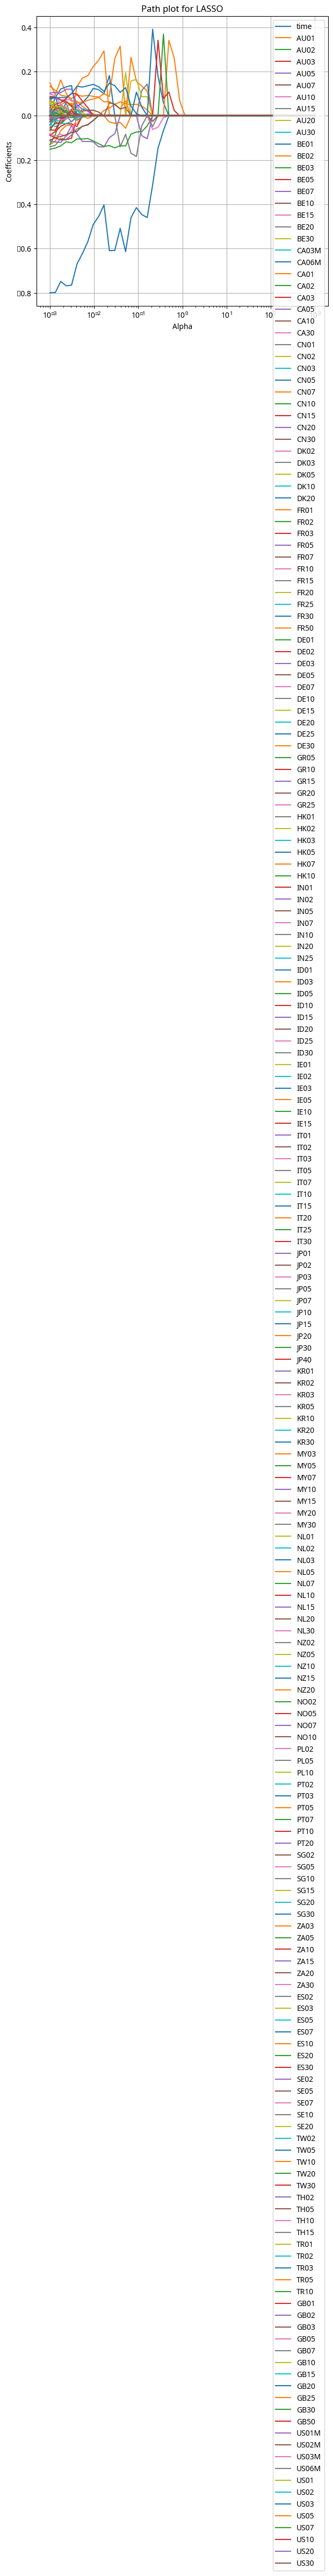

In [47]:
#Cell_17.
ret = []
alphas = 10 ** np.linspace(-3, 3, num=50)
print(alphas)

for al in alphas:
    r = model.fit_regularized(L1_wt=1.0, alpha=al)
    ret.append(r.params)

df_ret = pd.DataFrame(ret, columns=X_scaled.columns, index=alphas)
display(df_ret.head())  # debug
df_ret.plot(figsize=(7,7))
plt.title('Path plot for LASSO')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.xscale("log")
plt.grid(True)

In [48]:
#Cell_18.
result = model.fit_regularized(
                    method='elastic_net',
                    alpha=0.05,
                    L1_wt=1.0,
                    start_params=None,
                    profile_scale=False,
                    refit=False
                    )
b= result.params
print(b[b!=0])

time   -0.616598
AU01   -0.056320
BE02    0.068634
BE20   -0.083684
BE30    0.194338
FR01    0.052101
GR05   -0.136034
JP02    0.039604
TW05    0.129886
dtype: float64


In [49]:
#Cell_19.
# 1. Get variable names with nonzero coefficients
selected_vars = list(result.params[result.params != 0].index)
print(selected_vars)

# 2. Subset the design matrix accordingly
X = df_d[selected_vars]
Y = df_d[['close']]

['time', 'AU01', 'BE02', 'BE20', 'BE30', 'FR01', 'GR05', 'JP02', 'TW05']


In [50]:
#Cell_20.
X=sm.add_constant(X)
model=sm.OLS(Y,X)

In [51]:
#Cell_21.
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     433.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           4.96e-73
Time:                        14:27:15   Log-Likelihood:                -391.46
No. Observations:                 105   AIC:                             802.9
Df Residuals:                      95   BIC:                             829.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        586.7175    114.693      5.116      0.0

In [52]:
#Cell_22.
#Cell_22.
import numpy as np
import pandas as pd

# Reuse the same selected variable list
selected_vars = list(result.params[result.params != 0].index)

# (Optional) remove intercept or time if you don't want to include them in the test data
selected_vars = [v for v in selected_vars if v != 'const']

# Construct a virtual dataset with 2 samples (rows)
# You can adjust the numeric values as you like.
n_vars = len(selected_vars)
X_test = pd.DataFrame([
    np.linspace(0.1, 1.0, n_vars),           # first synthetic example
    np.linspace(1.1, 2.0, n_vars)            # second synthetic example
], columns=selected_vars)

print("X for prediction:")
display(X_test)


X for prediction:


,time,AU01,BE02,BE20,BE30,FR01,GR05,JP02,TW05
0,0.1,0.2125,0.325,0.4375,0.55,0.6625,0.775,0.8875,1.0
1,1.1,1.2125,1.325,1.4375,1.55,1.6625,1.775,1.8875,2.0


In [53]:
#Cell_23.
# Only keep columns with nonzero coefficients
selected_vars = list(result.params[result.params != 0].index)

print(selected_vars)
X_test_small = sm.add_constant(X_test[selected_vars[1:]], has_constant='add')  # drop const if included twice

print(X_test_small)

# Recompute y manually using the selected coefficients only
b_small = result.params[selected_vars]
y_test = np.dot(X_test_small, b_small)
print("Predicted y:")
print(y_test)

['time', 'AU01', 'BE02', 'BE20', 'BE30', 'FR01', 'GR05', 'JP02', 'TW05']
   const    AU01   BE02    BE20  BE30    FR01   GR05    JP02  TW05
0    1.0  0.2125  0.325  0.4375  0.55  0.6625  0.775  0.8875   1.0
1    1.0  1.2125  1.325  1.4375  1.55  1.6625  1.775  1.8875   2.0
Predicted y:
[-0.44186181 -0.2333374 ]
